In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

You can generate the data from the above GIF using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:

A two-dimensional NumPy array with the x- and y-values for each of the samples

A one-dimensional NumPy array containing the cluster labels for each sample

In [50]:
features, true_labels = make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42
 )


Nondeterministic machine learning algorithms like k-means are difficult to reproduce. The random_state parameter is set to an integer value so you can follow the data presented in the tutorial. In practice, it’s best to leave random_state as the default value, None.

In [51]:
# Here’s a look at the first five elements for each of the variables returned by make_blobs():
print(features[:5])

print(true_labels[:5])

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]


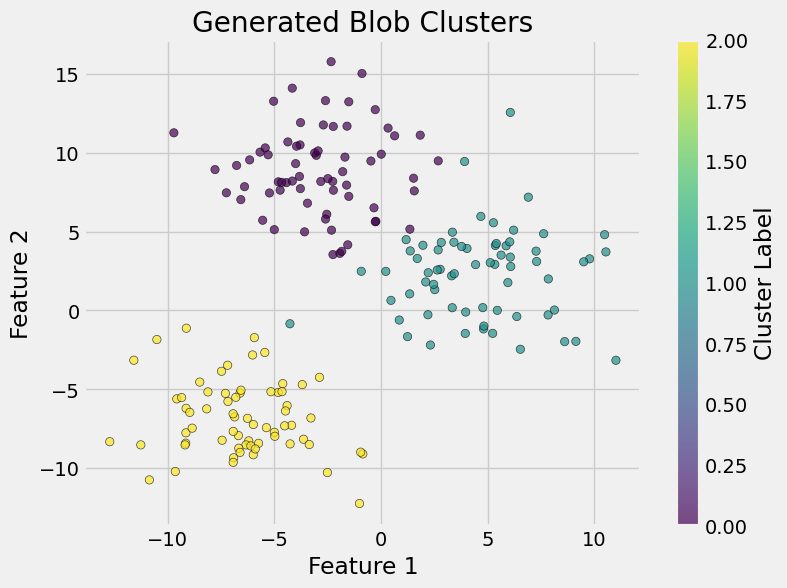

In [52]:
# Scatter plot of generated data points
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=true_labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Blob Clusters")
plt.colorbar(label="Cluster Label")  # Shows the mapping of colors to clusters
plt.show()

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. A great way to determine which technique is appropriate for your dataset is to read scikit-learn’s preprocessing documentation.

In this example, you’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [53]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5] # lets look at 5 values

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

## Lets apply Kmeans
- init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". 

- n_clusters sets k for the clustering step. This is the most important parameter for k-means.

- n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [56]:
kmeans = KMeans(
init="random", # k-means++, random
n_clusters=3,
n_init=10,
 max_iter=300,
random_state=42
)

In [57]:
# Now that the k-means class is ready, the next step is to fit it to the data in scaled_features.
# This will perform ten runs of the k-means algorithm on your data 
# with a maximum of 300 iterations per run:

kmeans.fit(scaled_features)

KMeans(n_clusters=3, n_init=10, random_state=42)

### SSE
SSE (Sum of Squared Errors) in the context of K-Means clustering refers to the sum of the squared distances between each data point and its assigned cluster's centroid. It is a measure of how well the data points fit their respective clusters. The goal of K-Means clustering is to minimize the SSE, as a lower SSE indicates that the data points are closer to their centroids and the clustering solution is more compact.

In [58]:
# Lets look at the stats
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

74.57960106819853
[[ 1.19539276  0.13158148]
 [-0.91941183 -1.18551732]
 [-0.25813925  1.05589975]]
6


In [59]:
# Finally, the cluster assignments are stored as a one-dimensional NumPy array 
# in kmeans.labels_. Here’s a look at the first five predicted labels:
print(kmeans.labels_[:5])

[0 2 1 1 1]


Note that the order of the cluster labels for the first two data objects was flipped. The order was [1, 0] in true_labels but [0, 1] in kmeans.labels_ even though those data objects are still members of their original clusters in kmeans.lables_.

This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics.

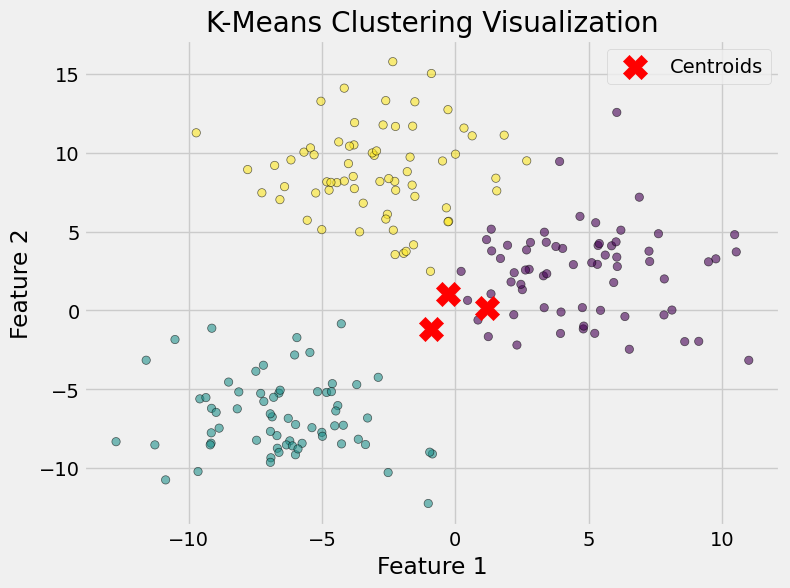

In [60]:
# Plot clustered data
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label="Centroids")  # Mark centroids

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.show()

## Choosing the Appropriate Number of Clusters
2 methods that are commonly used to evaluate the appropriate number of clusters:

- The elbow method
- The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [61]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

print(sse)

[400.00000000000006, 173.23074893877768, 74.57960106819853, 61.37227628809653, 52.275387259021116, 45.18296492976122, 40.4655696972595, 34.79423830005605, 30.741955827546228, 28.200015604968435]


The previous code block made use of Python’s dictionary unpacking operator (**). To learn more about this powerful Python operator, check out How to Iterate Through a Dictionary in Python.

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

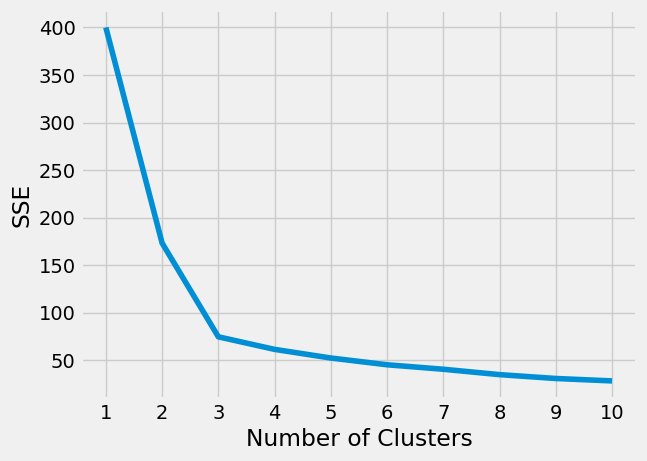

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow point is at k=3.

### silhouette coefficient
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [63]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)

[np.float64(0.5449728784485278), np.float64(0.5915043942870359), np.float64(0.4942652789850353), np.float64(0.39172760330275125), np.float64(0.33841064280869715), np.float64(0.33874040275554307), np.float64(0.35020175625136163), np.float64(0.3650337813526654), np.float64(0.3641264983430456)]


Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

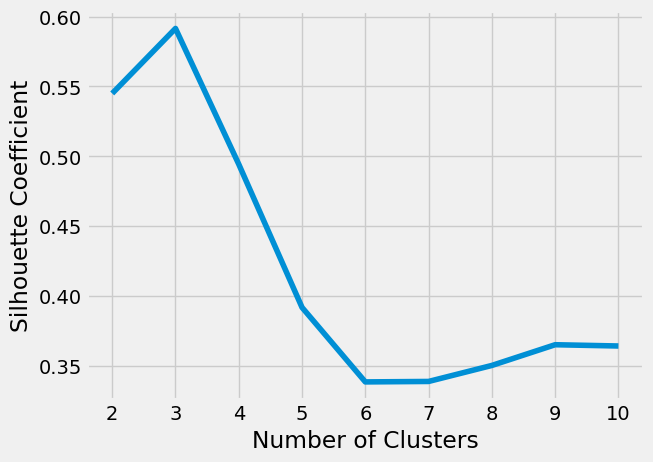

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

So it seems k=3 is the right clusters

In [65]:
# print the elements of each cluster. This way you can target these data points
for cluster_id in range(3):  # Loop through each cluster
    cluster_points = features[labels == cluster_id]  # Select points belonging to the cluster
    print(f"\nCluster {cluster_id}:")
    print(cluster_points)


Cluster 0:
[[ 9.77075874e+00  3.27621022e+00]
 [ 3.91207254e+00  9.45363489e+00]
 [ 2.09082004e+00  1.80947495e+00]
 [ 5.26539366e+00  5.56781226e+00]
 [ 7.61826975e+00  4.87112533e+00]
 [ 3.30512908e+00  2.19832357e+00]
 [ 6.52709436e+00 -2.46179896e+00]
 [ 1.04758084e+01  4.81244915e+00]
 [ 3.33377923e+00  1.76514294e-01]
 [ 1.23826438e+00 -1.65808600e+00]
 [ 4.61611430e-01  6.41525984e-01]
 [ 1.10051899e+01 -3.16180960e+00]
 [ 1.33906372e+00  1.05329129e+00]
 [ 9.12900992e+00 -1.95971911e+00]
 [ 6.36046404e+00 -3.84013596e-01]
 [ 2.19371415e+00 -2.70308600e-01]
 [ 8.51288074e-01 -6.05849176e-01]
 [ 3.94531642e+00 -1.45823407e+00]
 [ 1.36379422e+00  3.77869211e+00]
 [ 2.81996606e+00  4.31736135e+00]
 [ 1.34848673e+00  5.15919571e+00]
 [ 6.05622582e+00  3.38608105e+00]
 [ 1.69492447e+00  3.29996883e+00]
 [ 6.05625997e+00  1.25681813e+01]
 [ 5.22863663e+00 -1.45261196e+00]
 [ 4.79995281e+00 -1.16999864e+00]
 [ 4.76520140e+00  1.81268728e-01]
 [ 4.67563404e+00  5.97038840e+00]
 [ 5.328